## setup
1. random seed set up  
2. load data  

In [1]:
import numpy as np

my_seed = 0
np.random.seed(my_seed)

In [2]:
import pandas as pd

raw_data = pd.read_excel('table.xlsx')
print(len(raw_data))
raw_data.head()

1045


,Unnamed: 0,Id,Name,Type(s),TotalBS,HP,Attack,Defense,Special Attack,Special Defense,Speed,number of battles,number of wins
0,0,1,bulbasaur,"['GRASS', 'POISON']",318,45,49,49,65,65,45,16,4
1,1,2,ivysaur,"['GRASS', 'POISON']",405,60,62,63,80,80,60,17,7
2,2,3,venusaur,"['GRASS', 'POISON']",525,80,82,83,100,100,80,128,67
3,3,3,mega venusaur,"['GRASS', 'POISON']",625,80,100,123,122,120,80,0,0
4,4,4,charmander,['FIRE'],309,39,52,43,60,50,65,7,3


some columns are not needed, [Ids, Names, Icons, Types]   
also rename the columns to no space

In [3]:
data = raw_data

data['WinRates'] = data['number of wins']/data['number of battles']
columns_to_drop = ['Unnamed: 0', 'Id', 'Name', 'Type(s)']
data.drop(labels=columns_to_drop, axis='columns', inplace=True)

new_column_mapping = {name:name.replace(' ', '') for name in data.columns}
data.rename(columns = new_column_mapping, inplace=True)

data.describe()

,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,numberofbattles,numberofwins,WinRates
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,786.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,17.023923,8.511962,0.481150
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,43.327104,22.680462,0.285815
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,1.000000,0.000000,0.333333
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,4.000000,1.000000,0.500000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,11.000000,6.000000,0.636364
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,537.000000,278.000000,1.000000


comments: 
- 
___

## data cleaning  
1. drop nan rows 
2. kicking out less then 10 battles and 0 wins and 100% wins
3. then we get the win rate from `numberofwins/numberofbattles`

In [4]:
data.dropna(inplace=True)
print(len(data))
data.head()

786


,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,numberofbattles,numberofwins,WinRates
0,318,45,49,49,65,65,45,16,4,0.250000
1,405,60,62,63,80,80,60,17,7,0.411765
2,525,80,82,83,100,100,80,128,67,0.523438
4,309,39,52,43,60,50,65,7,3,0.428571
5,405,58,64,58,80,65,80,18,15,0.833333


In [5]:
data = data[ data['numberofbattles'] > 10 ]

# data = data[ data['WinRates'] != 1 ]
# data = data[ data['WinRates'] != 0 ]

print(len(data))
data.describe()

270


,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,numberofbattles,numberofwins,WinRates
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,499.977778,80.007407,91.088889,85.118519,82.814815,83.081481,77.866667,58.170370,29.166667,0.483417
std,90.416793,28.635122,30.128712,31.297126,30.659343,27.591026,29.122431,70.496913,37.553902,0.135804
min,236.000000,1.000000,5.000000,5.000000,10.000000,30.000000,5.000000,11.000000,0.000000,0.000000
25%,462.750000,61.250000,70.000000,65.000000,60.000000,65.000000,55.000000,17.000000,8.000000,0.428571
50%,518.000000,79.500000,90.000000,80.000000,80.000000,80.000000,80.000000,30.500000,15.500000,0.498663
75%,570.000000,95.000000,114.250000,100.000000,105.000000,100.000000,100.000000,72.000000,36.000000,0.562262
max,720.000000,255.000000,181.000000,230.000000,170.000000,230.000000,200.000000,537.000000,278.000000,0.875000


comments: 
- 
___

## initial data and OLS summary

In [6]:
import statsmodels.formula.api as smf

model = smf.ols(formula="WinRates ~ HP + Attack + Defense + SpecialAttack + SpecialDefense + Speed", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WinRates   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.170
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.51e-06
Time:                        17:31:24   Log-Likelihood:                 174.23
No. Observations:                 270   AIC:                            -334.5
Df Residuals:                     263   BIC:                            -309.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2395      0.045      5.320      0.000       0.151       0.328
HP                 0.0003      0.000      0.991      0.322      -0.000       0.001
Attack             0.0006      0.000      2.007      0.046    1.13e-05       0.001
Defense            0.0006      0.000      1.935      0.054   -1.01e-05       0.001
SpecialAttack      0.0005      0.000      1.628      0.105      -0.000       0.001
SpecialDefense     0.0008      0.000      2.459      0.015       0.000       0.002
Speed           7.679e-05      0.000      0.246      0.806      -0.001       0.001
==============================================================================
Omnibus:                       14.848   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.351
Skew:                           0.274   Prob(JB):                     6.98e-07
Kurtosis:                       4.490   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

comments:  
- p-values suggest HP and speed are somehow not related to win rate, as their p-valeus are high
- we got hige conditional number, suggesting multicollinearity, so lets plot something to have look 
___

## plots
1. win rates against each individual feature  
2. correlaterion matrix heatmap

'numberofbattles', 'numberofwins' are just to filled up the plot (9x9) space

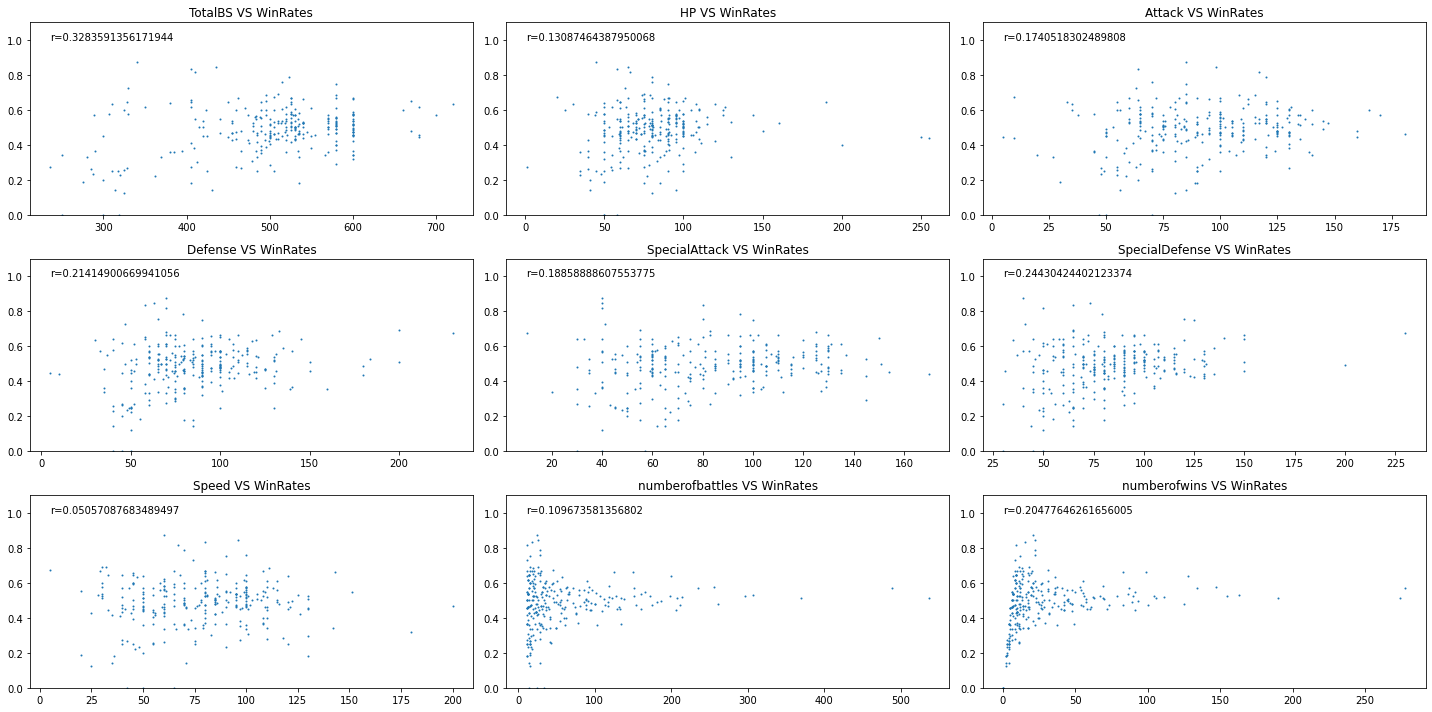

In [7]:
from matplotlib import pyplot as plt

verus = ['TotalBS', 'HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed', 'numberofbattles', 'numberofwins']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))

for i, ax in enumerate(axes.ravel()):
    ax.scatter(data[verus[i]], data['WinRates'], s=1)
    ax.set(ylim =(0, 1.1))
    ax.set_title(verus[i] + ' VS ' + 'WinRates')
    r = np.corrcoef(data[verus[i]], data['WinRates'])[0][1]
    ax.text(min(data[verus[i]]), 1.0, f'r={r}')

fig.tight_layout()

In [8]:
corrMatrix = data.corr()
corrMatrix

,TotalBS,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,numberofbattles,numberofwins,WinRates
TotalBS,1.000000,0.481552,0.542573,0.438277,0.628924,0.532332,0.432438,0.285061,0.307744,0.328359
HP,0.481552,1.000000,0.186519,-0.019285,0.166708,0.171110,0.001958,0.144419,0.149322,0.130875
Attack,0.542573,0.186519,1.000000,0.264986,0.089662,-0.115636,0.196970,0.161351,0.181026,0.174052
Defense,0.438277,-0.019285,0.264986,1.000000,-0.047289,0.321475,-0.223916,0.102134,0.121816,0.214149
SpecialAttack,0.628924,0.166708,0.089662,-0.047289,1.000000,0.324817,0.386261,0.185356,0.195642,0.188589
SpecialDefense,0.532332,0.171110,-0.115636,0.321475,0.324817,1.000000,-0.030729,0.165883,0.183498,0.244304
Speed,0.432438,0.001958,0.196970,-0.223916,0.386261,-0.030729,1.000000,0.114046,0.110624,0.050571
numberofbattles,0.285061,0.144419,0.161351,0.102134,0.185356,0.165883,0.114046,1.000000,0.989868,0.109674
numberofwins,0.307744,0.149322,0.181026,0.121816,0.195642,0.183498,0.110624,0.989868,1.000000,0.204776
WinRates,0.328359,0.130875,0.174052,0.214149,0.188589,0.244304,0.050571,0.109674,0.204776,1.000000


<AxesSubplot:>

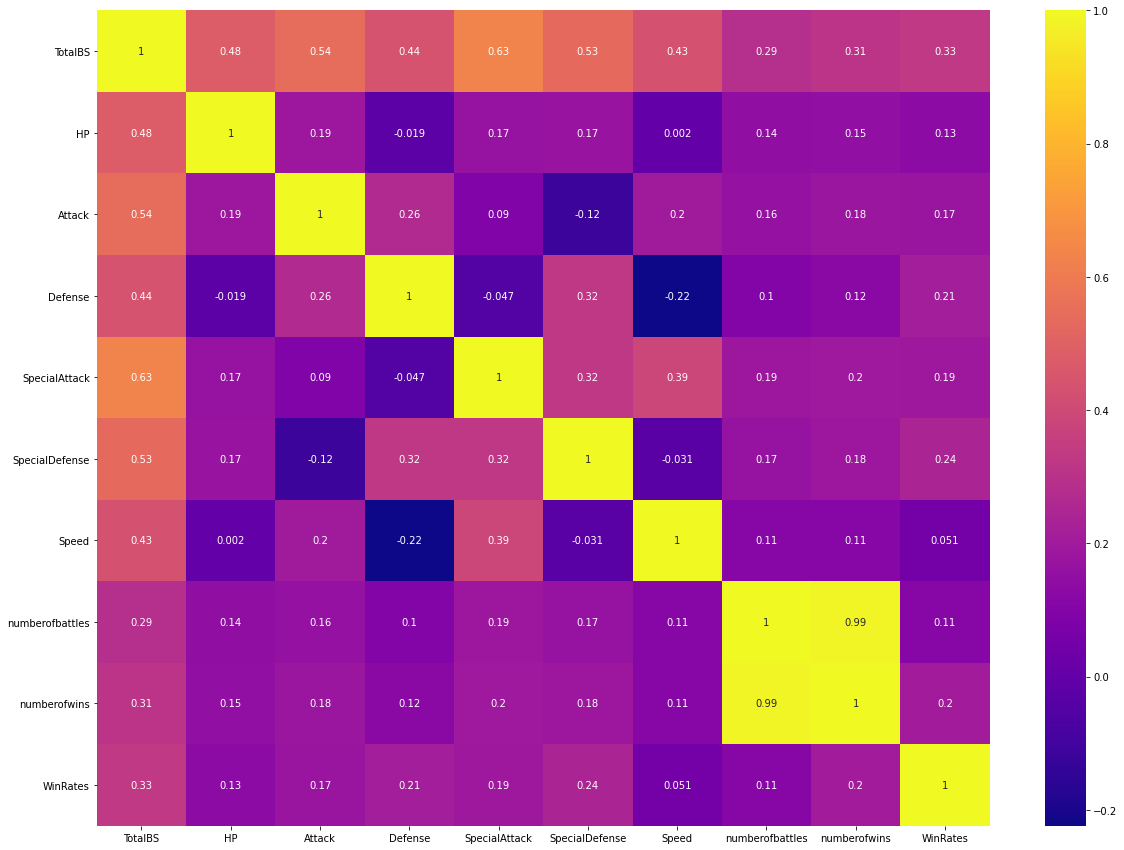

In [9]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,15)) 
sn.heatmap(corrMatrix, annot=True, cmap='plasma', ax=ax)


comments: 
- 
___

## training 
1. assigning X (features) and y (labels)
2. numpy-array-rise (verb) them
3. train test split (test set is for final proformance evaluation, within training the term 'validation set' is used)

In [10]:
X = data[ ['HP', 'Attack', 'Defense', 'SpecialAttack', 'SpecialDefense', 'Speed']]
y = data['WinRates']

X = X.to_numpy(dtype=int, copy=True)
y = y.to_numpy(dtype=float, copy=True)

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (270, 6)
y shape: (270,)


In [11]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=my_seed)

standardising the data lead to enormous results, so I gave up doing it

    standardising.fit(X_train)
    X_train_standardised = standardising.fit_transform(X_train, y_train)
    lr = LinearRegression()
    lr.fit(X_train_standardised, y_train)
    y_pred = lr.predict(X_test)
    mean_squared_error(y_pred, y_test)

comments: 
- 
___

## modeling 
1. try linear regression 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_pred, y_test)

0.01878516079531633

In [13]:
lr.coef_

array([0.00019416, 0.00046865, 0.00041792, 0.00043213, 0.00087763,
       0.00011534])

In [14]:
lr.predict( [[0,0,0,0,0,0]] )

array([0.27601211])

## k-fold

In [15]:
from sklearn.metrics import mean_squared_error

# k-fold function here
def k_fold(dataset: any, n_splits: int=5):
    choose_from = np.array_split(dataset, n_splits)
    for i, chuck in enumerate(choose_from): 
        # print(choose_from[:i].__len__(), choose_from[i+1:].__len__())
        training = np.concatenate(choose_from[:i] + choose_from[i+1:]) # TODO investigate np.concatenate() and flatten array
        yield (training, chuck)

def k_fold_training(model, X, y, X_test=[], y_test=[], n_splits=5): 
    loss = []
    for (X_train, X_validation), (y_train, y_validation) in zip(k_fold(X, n_splits), k_fold(y, n_splits)): 
        
        model.fit(X_train, y_train)

        try: 
            y_pred = model.predict(X_validation)
        except: 
            continue

        each_fold_loss = model.score(X_validation, y_validation)
        loss.append(each_fold_loss)

    if X_test != [] and y_test != []: 
        print( f'test performance: {model.score(X_test, y_test)}' )

    print(f'K-Fold estimated loss: {loss} ')

def test_interesting_cases(model, X, y, n_splits=5): 
    k_fold_training(model, X, y, n_splits=5)
    extreme_cases = {
        'theoretical max' : [255, 255, 255, 255, 255, 255],
        'legendary' : [97.1, 112.73, 100.85, 115.76, 105.46, 94.69], # https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon
        'mythical_avg' : [81.39, 109.78, 92.91, 118, 99.35, 105.52], # https://bulbapedia.bulbagarden.net/wiki/Mythical_Pok%C3%A9mon
        'mythical' : [100, 100, 100, 100, 100, 100],
        'average' : [80, 80, 80, 80, 80, 80],
        'weak' : [50, 50, 50, 50, 50, 50], 
        'max HP' : [255, 80, 80, 80, 80, 80], 
        'max Attack' : [80, 255, 80, 80, 80, 80], 
        'max Defense' : [80, 80, 255, 80, 80, 80], 
        'max SpecialAttack' : [80, 80, 80, 255, 80, 80], 
        'max SpecialDefense' : [80, 80, 80, 80, 255, 80], 
        'Speed Attack' : [80, 255, 80, 80, 80, 255], 
        'Speed SpecialAttack' : [80, 80, 80, 255, 80, 255], 
        'Tank Attack' : [255, 255, 80, 80, 80, 80], 
        'Tank SpecialAttack' : [255, 80, 80, 255, 80, 80], 
        'Defense Tank' : [255, 80, 255, 80, 80, 80], 
        'SpecialDefense Tank' : [255, 80, 255, 80, 80, 80], 
        'theoretical min' : [1, 1, 1, 1, 1, 1]
        }
    for case in extreme_cases: 
        print(f'{case} pokemon: {round(model.predict([extreme_cases[case]])[0]*100, 3)} %')

In [16]:
k_fold_training(LinearRegression(normalize=True), X_train, y_train, X_test=X_test, y_test=y_test) 

test performance: 0.13536590497810008
K-Fold estimated loss: [0.012412415284705935, -0.13224950320230233, 0.03864936381239359, 0.16105814514559835, 0.10051141070556191] 
<ipython-input-15-9e53c7e1d376>:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if X_test != [] and y_test != []:


In [17]:
test_interesting_cases(LinearRegression(normalize=True), X_train, y_train)

K-Fold estimated loss: [0.012412415284705935, -0.13224950320230233, 0.03864936381239359, 0.16105814514559835, 0.10051141070556191] 
theoretical max pokemon: 94.578 %
legendary pokemon: 54.321 %
mythical_avg pokemon: 53.424 %
mythical pokemon: 53.043 %
average pokemon: 47.683 %
weak pokemon: 39.644 %
max HP pokemon: 51.638 %
max Attack pokemon: 58.277 %
max Defense pokemon: 52.495 %
max SpecialAttack pokemon: 50.034 %
max SpecialDefense pokemon: 65.587 %
Speed Attack pokemon: 65.559 %
Speed SpecialAttack pokemon: 57.316 %
Tank Attack pokemon: 62.231 %
Tank SpecialAttack pokemon: 53.988 %
Defense Tank pokemon: 56.449 %
SpecialDefense Tank pokemon: 56.449 %
theoretical min pokemon: 26.514 %


In [18]:
from sklearn.tree import DecisionTreeRegressor

test_interesting_cases(DecisionTreeRegressor(criterion='mse', random_state=my_seed), X_train, y_train)

K-Fold estimated loss: [-0.8705090037345291, -0.9653430983649061, -1.0442087556081288, -0.3385518021296685, -1.8598215839748025] 
theoretical max pokemon: 29.412 %
legendary pokemon: 43.478 %
mythical_avg pokemon: 36.364 %
mythical pokemon: 51.998 %
average pokemon: 36.066 %
weak pokemon: 25.0 %
max HP pokemon: 36.066 %
max Attack pokemon: 78.571 %
max Defense pokemon: 66.667 %
max SpecialAttack pokemon: 52.344 %
max SpecialDefense pokemon: 51.22 %
Speed Attack pokemon: 42.308 %
Speed SpecialAttack pokemon: 42.308 %
Tank Attack pokemon: 55.696 %
Tank SpecialAttack pokemon: 52.344 %
Defense Tank pokemon: 47.403 %
SpecialDefense Tank pokemon: 47.403 %
theoretical min pokemon: 18.75 %


___

In [19]:
model = smf.ols(formula="WinRates ~ Attack + SpecialDefense", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               WinRates   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     15.03
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           6.55e-07
Time:                        17:31:41   Log-Likelihood:                 170.85
No. Observations:                 270   AIC:                            -335.7
Df Residuals:                     267   BIC:                            -324.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2896      0.037      7.912      0.000       0.218       0.362
Attack             0.0009      0.000      3.510      0.001       0.000       0.001
SpecialDefense     0.0013      0.000      4.588      0.000       0.001       0.002
==============================================================================
Omnibus:                        9.663   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               18.173
Skew:                           0.090   Prob(JB):                     0.000113
Kurtosis:                       4.258   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = data[ ['Attack', 'SpecialDefense']]
y = data['WinRates']

X = X.to_numpy(dtype=int, copy=True)
y = y.to_numpy(dtype=float, copy=True)

print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (270, 2)
y shape: (270,)


In [22]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=my_seed)

In [23]:
from sklearn.metrics import mean_squared_error

# k-fold function here
def k_fold(dataset: any, n_splits: int=5):
    choose_from = np.array_split(dataset, n_splits)
    for i, chuck in enumerate(choose_from): 
        # print(choose_from[:i].__len__(), choose_from[i+1:].__len__())
        training = np.concatenate(choose_from[:i] + choose_from[i+1:]) # TODO investigate np.concatenate() and flatten array
        yield (training, chuck)

def k_fold_training(model, X, y, X_test=[], y_test=[], n_splits=5): 
    loss = []
    for (X_train, X_validation), (y_train, y_validation) in zip(k_fold(X, n_splits), k_fold(y, n_splits)): 
        
        model.fit(X_train, y_train)

        try: 
            y_pred = model.predict(X_validation)
        except: 
            continue

        each_fold_loss = model.score(X_validation, y_validation)
        loss.append(each_fold_loss)

    if X_test != [] and y_test != []: 
        print( f'test performance: {model.score(X_test, y_test)}' )

    print(f'K-Fold estimated loss: {loss} ')

def test_interesting_cases(model, X, y, n_splits=5): 
    k_fold_training(model, X, y, n_splits=5)
    extreme_cases = {
        'theoretical max' : [255, 255],
        'legendary' : [112.73, 105.46], # https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon
        'mythical_avg' : [109.78, 99.35], # https://bulbapedia.bulbagarden.net/wiki/Mythical_Pok%C3%A9mon
        'mythical' : [100, 100],
        'average' : [80, 80],
        'weak' : [50, 50], 
        'max Attack' : [255, 80],  
        'max SpecialDefense' : [80, 255], 
        'theoretical min' : [1, 1]
        }
    for case in extreme_cases: 
        print(f'{case} pokemon: {round(model.predict([extreme_cases[case]])[0]*100, 3)} %')

In [24]:
k_fold_training(LinearRegression(normalize=True), X_train, y_train, X_test=X_test, y_test=y_test) 

test performance: 0.11714842738548781
K-Fold estimated loss: [0.04104838593258686, -0.10236785247687452, 0.061775571918802674, 0.13954233959554818, 0.0998852151874734] 
<ipython-input-23-2403653cc84b>:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if X_test != [] and y_test != []:


In [25]:
test_interesting_cases(LinearRegression(normalize=True), X_train, y_train)

K-Fold estimated loss: [0.04104838593258686, -0.10236785247687452, 0.061775571918802674, 0.13954233959554818, 0.0998852151874734] 
theoretical max pokemon: 83.863 %
legendary pokemon: 53.319 %
mythical_avg pokemon: 52.306 %
mythical pokemon: 51.587 %
average pokemon: 47.423 %
weak pokemon: 41.176 %
max Attack pokemon: 61.748 %
max SpecialDefense pokemon: 69.538 %
theoretical min pokemon: 30.973 %
